In [1]:
import numpy as np
import pandas as pd

# Data Train

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
dfnew = pd.read_csv('drive/My Drive/MSIB5-DataSience/Dataset/train.csv')
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Check and Handling Missing Value

### Missing value Numbering

In [4]:
# untuk check missing value di data numeric
dfnew.select_dtypes(include=['int', 'float']).isna().sum().sort_values(ascending = False)

,0
LotFrontage,259
GarageYrBlt,81
MasVnrArea,8
Id,0
OpenPorchSF,0
KitchenAbvGr,0
TotRmsAbvGrd,0
Fireplaces,0
GarageCars,0
GarageArea,0


   
**dari hasil analisa saya tottal tanah dan total keseluruhan luas bangunan masih banyak menyisakan tanah kosong. Jadi data yang kolom LotFrontage memiliki nilai NAN,<br>
bisa jadi karena memang kehilangan datanaya. dan harusnya semua data memiliki LotFrontage<br>
dengan alasan ini saya mengganti nilai missing value menggunakan nilai median<br>**

In [5]:
#mengganti missing ke nilai median
median_LotFrontage = dfnew['LotFrontage'].median()
dfnew['LotFrontage'].fillna(median_LotFrontage, inplace=True)

<ipython-input-5-721ba5afcdb6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfnew['LotFrontage'].fillna(median_LotFrontage, inplace=True)


**Dari hasil analisa diatas bawasannya data yang memiliki niulai NaN pada kolom GarageYrBlt, terjadi karena pada data tersebut benar-benar tidak memiliki garasi. <br>
Jadi oleh karena itu saya handling dengan cara mengganti nilai NaN menjadi 0**

In [6]:
#mengganti missing ke nilai 0
dfnew['GarageYrBlt'].fillna(0, inplace=True)

<ipython-input-6-97efbc5d22ee>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfnew['GarageYrBlt'].fillna(0, inplace=True)


Dari Hasil Analysa diatas menelaskan bahwa data yang memiliki nilai NaN pada kolom MasVnrArea, terjadi karena permukaan dinding memang tidak dilapisi pelindung

In [7]:
#mengganti missing ke nilai 0
dfnew['MasVnrArea'].fillna(0, inplace=True)

<ipython-input-7-a9a3bca30934>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfnew['MasVnrArea'].fillna(0, inplace=True)


**Dari hasil analisa diaats bawasannya data yang memiliki nilai Nan Pada kolom PoolQC terjadi karena, memang data tersebut tidak memiliki kolam renang.
Jadi untuk menjaga data yang mempunyai kolam renang dan kualitasnya saya hadlling dengan mengganti nailai NaN menjadi "NotHavePoll"**

In [8]:
#mengganti NaN menjadi 'NothavePool'
dfnew['PoolQC'].fillna("NotPool", inplace=True)

<ipython-input-8-a6e62af5222d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfnew['PoolQC'].fillna("NotPool", inplace=True)


MiscFeature adalah kolom yang menjelaskan fitur tambahan yang terdapat pada rumah/propreti.<br>
Jadi menurut analaisa saya kolom ini sangat mempengaruhi harga jual rumah.. oleh karena itu untuk menjaga data yang memiliki fitur tambahan<br>
saya handling dengan cara mengganri missing value dengan NFeatureAdd

In [9]:
dfnew['MiscFeature'].fillna("NFeatureAdd", inplace=True)

<ipython-input-9-6237bce66426>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfnew['MiscFeature'].fillna("NFeatureAdd", inplace=True)


kolom Allay adalah kolom yang menjelaskan tentang jenis jalan gang..menurut pandangan saya banyak rumah atau properti yang tidak masuk ke jalan gang<br>
oleh karena itu handling dengan cara mengganti NaN Value menjadi "NAllay"

In [10]:
dfnew['Alley'].fillna("NAllay", inplace=True)

<ipython-input-10-d03dd495b689>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfnew['Alley'].fillna("NAllay", inplace=True)


Fence merupakan kolom yang memebrikan informasi jenis pagar yang di gunakan pada setiap rumah/ properti
dalam kasu dunia nyata banyak rumah/properti tidak memiliki pagar. oleh karena itu untuk handling dengan mengganti nilai NaN menjadi NFence

In [11]:
dfnew['Fence'].fillna("NFence", inplace=True)

<ipython-input-11-f320c2ccd302>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfnew['Fence'].fillna("NFence", inplace=True)


Dari Hasil Analysa diatas menelaskan bahwa data yang memiliki nilai NaN pada kolom MasVnrType, terjadi karena permukaan dinding memang tidak dilapisi pelindung

In [12]:
dfnew['MasVnrType'].fillna("NVnr", inplace=True)

<ipython-input-12-65865641201a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfnew['MasVnrType'].fillna("NVnr", inplace=True)


dari hasil analisa diatas data yang memilkim nilai NaN pada kolom FireplaceQu terjadi kerena bawasannya dalm rumah atau propreti tidak memiliki Fireplaces. untuk menjaga data rumah yang memiliki Fireplaces saya handling dengan cara mengganti NaN menjadi "NFireplace"

In [13]:
dfnew['FireplaceQu'].fillna("NFireplace", inplace=True)

<ipython-input-13-0d518baf51d6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfnew['FireplaceQu'].fillna("NFireplace", inplace=True)


Dari hasil analisa diatas bawasanya data yang mimiliki nilai NaN pada kolom GarageType ,GarageCond ,GarageQual dan GarageFinish
terjadi karena tidak memilki Garasi. Oleh karena itu untuk menjaga kerasionalan data dan data properi yang memilki garasi, handling dengan cara mengganti Nilai Nan dengan "NGarage'

In [14]:
dfnew['GarageType'].fillna("Ngarage", inplace=True)
dfnew['GarageCond'].fillna("Ngarage", inplace=True)
dfnew['GarageQual'].fillna("Ngarage", inplace=True)
dfnew['GarageFinish'].fillna("Ngarage", inplace=True)

<ipython-input-14-eb5631a058d1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfnew['GarageType'].fillna("Ngarage", inplace=True)
<ipython-input-14-eb5631a058d1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

Dari analisa diatas bawasannya kolom-kolom diatas yang memilki nilai NaN terjadi karena bawasannya rumah/proprerti tersebut tidak memiliki basemant
Oleh Kerana itu handling dengan cara mengganti nilai NaN menjadi NBsmt

In [15]:
dfnew['BsmtFinType2'].fillna("NBsmt", inplace=True)
dfnew['BsmtExposure'].fillna("NBsmt", inplace=True)
dfnew['BsmtFinType1'].fillna("NBsmt", inplace=True)
dfnew['BsmtQual'].fillna("NBsmt", inplace=True)
dfnew['BsmtCond'].fillna("NBsmt", inplace=True)

<ipython-input-15-e76010365d94>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfnew['BsmtFinType2'].fillna("NBsmt", inplace=True)
<ipython-input-15-e76010365d94>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

Dalam analisa saya kolom ini menelaskan tentang jenis layanan listrik yang digunkan...dalam zaman sekarang semua rumah pasti memiliki listrik.
Misiing value ini mungkin terjadi karena datanay hilang..Oleh karena itu hadlingnya dengan mengisi nilai NaN Menjadi nilai modus dari kolom tersebut

In [16]:
modusElec = dfnew['Electrical'].mode()
dfnew['Electrical'].fillna("modusElec", inplace=True)

<ipython-input-16-8ffaa2814f8e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfnew['Electrical'].fillna("modusElec", inplace=True)


In [17]:
#check
dfnew.isna().sum().sort_values(ascending = False)

,0
Id,0
CentralAir,0
GarageYrBlt,0
GarageType,0
FireplaceQu,0
...,...
MasVnrArea,0
MasVnrType,0
Exterior2nd,0
Exterior1st,0


## Duplicated Data

In [18]:
 dfnew[dfnew.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


## CASETING DATA

In [19]:
dfnew['MSSubClass'] = dfnew['MSSubClass'].astype('category')
dfnew['MSZoning'] = dfnew['MSZoning'].astype('category')
dfnew['Street'] = dfnew['Street'].astype('category')
dfnew['Alley'] = dfnew['Alley'].astype('category')
dfnew['LandContour'] = dfnew['LandContour'].astype('category')
dfnew['Utilities'] = dfnew['Utilities'].astype('category')
dfnew['LotConfig'] = dfnew['LotConfig'].astype('category')
dfnew['LandSlope'] = dfnew['LandSlope'].astype('category')
dfnew['Neighborhood'] = dfnew['Neighborhood'].astype('category')
dfnew['Condition1'] = dfnew['Condition1'].astype('category')
dfnew['Condition2'] = dfnew['Condition2'].astype('category')
dfnew['BldgType'] = dfnew['BldgType'].astype('category')
dfnew['HouseStyle'] = dfnew['HouseStyle'].astype('category')
dfnew['RoofStyle'] = dfnew['RoofStyle'].astype('category')
dfnew['RoofMatl'] = dfnew['RoofMatl'].astype('category')
dfnew['Exterior1st'] = dfnew['Exterior1st'].astype('category')
dfnew['Exterior2nd'] = dfnew['Exterior2nd'].astype('category')
dfnew['MasVnrType'] = dfnew['MasVnrType'].astype('category')
dfnew['ExterQual'] = dfnew['ExterQual'].astype('category')
dfnew['ExterCond'] = dfnew['ExterCond'].astype('category')
dfnew['Foundation'] = dfnew['Foundation'].astype('category')
dfnew['BsmtQual'] = dfnew['BsmtQual'].astype('category')
dfnew[' BsmtCond'] = dfnew['BsmtCond'].astype('category')
dfnew['BsmtExposure'] = dfnew['BsmtExposure'].astype('category')
dfnew['BsmtFinType2'] = dfnew['BsmtFinType2'].astype('category')
dfnew['BsmtFinType1'] = dfnew['BsmtFinType1'].astype('category')
dfnew['Heating'] = dfnew['Heating'].astype('category')
dfnew['HeatingQC'] = dfnew['HeatingQC'].astype('category')
dfnew['CentralAir'] = dfnew['CentralAir'].astype('category')
dfnew['Electrical'] = dfnew['Electrical'].astype('category')
dfnew['KitchenQual'] = dfnew['KitchenQual'].astype('category')
dfnew['Functional'] = dfnew['Functional'].astype('category')
dfnew['FireplaceQu'] = dfnew['FireplaceQu'].astype('category')
dfnew['GarageType'] = dfnew['GarageType'].astype('category')
dfnew['GarageFinish'] = dfnew['GarageFinish'].astype('category')
dfnew['GarageQual'] = dfnew['GarageQual'].astype('category')
dfnew['PoolQC'] = dfnew['PoolQC'].astype('category')
dfnew['Fence'] = dfnew['Fence'].astype('category')
dfnew['MiscFeature'] = dfnew['MiscFeature'].astype('category')
dfnew['SaleType'] = dfnew['SaleType'].astype('category')
dfnew['SaleCondition'] = dfnew['SaleCondition'].astype('category')
dfnew['LotShape'] = dfnew['LotShape'].astype('category')
dfnew['GarageCond'] = dfnew['GarageCond'].astype('category')
dfnew['ExterQual'] = dfnew['ExterQual'].astype('category')
dfnew['BsmtQual'] = dfnew['BsmtQual'].astype('category')
dfnew['FireplaceQu'] = dfnew['FireplaceQu'].astype('category')
dfnew['GarageType'] = dfnew['GarageType'].astype('category')
dfnew['GarageQual'] = dfnew['GarageQual'].astype('category')
dfnew['SaleType'] = dfnew['SaleType'].astype('category')

## Outlier

In [20]:
#menentukan outlier dengan cara satatistiqal IQR
#Dimana Outlier akan terdeteksi pada saat values Q1–1,5 IQR atau di atas Q3 + 1,5 IQR
def find_outliers_IQR(dfnew):
    Q1 = dfnew.quantile(0.25)
    Q3 = dfnew.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (dfnew < lower_bound) | (dfnew > upper_bound)
    return outliers

# Memilih kolom-kolom numerik dalam DataFrame dfnew
numerical_columns = dfnew.select_dtypes(include=['int', 'float'])
# Mencari outlier dalam kolom-kolom numerik menggunakan IQR
outliers = find_outliers_IQR(numerical_columns)

In [21]:
outliers

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1458,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False


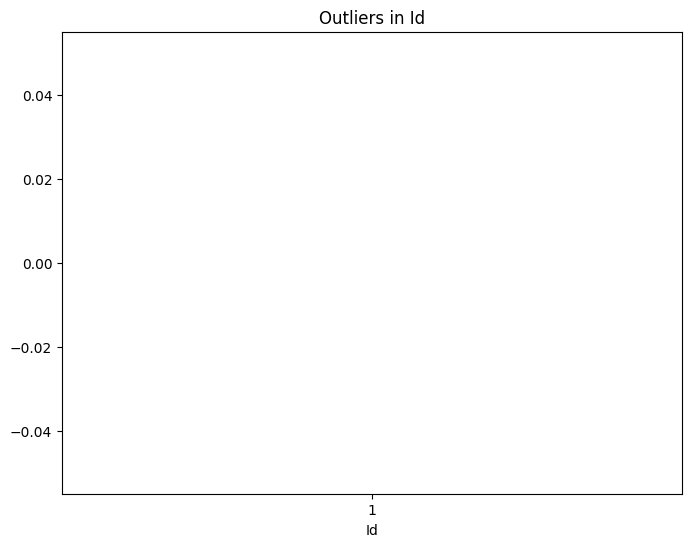

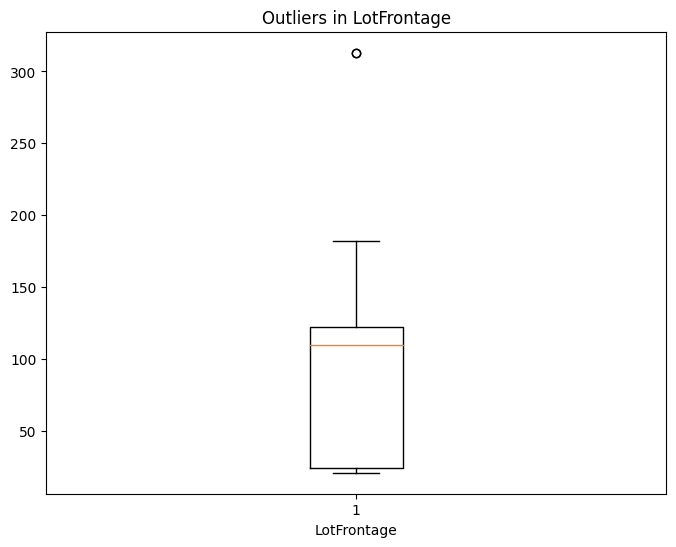

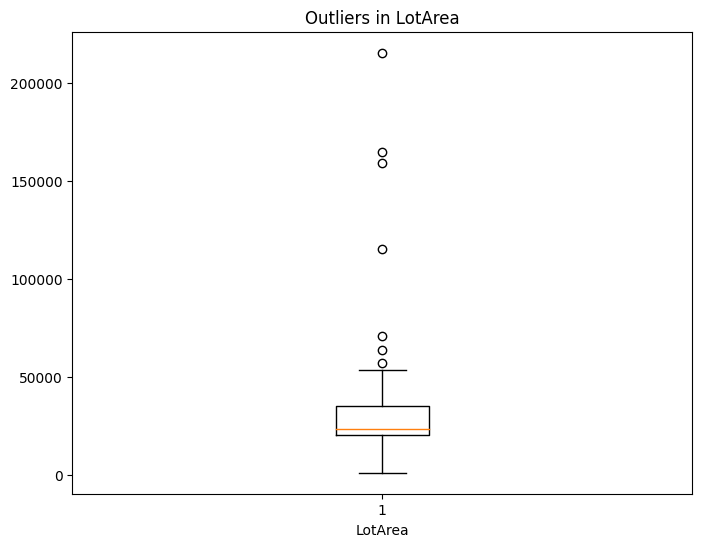

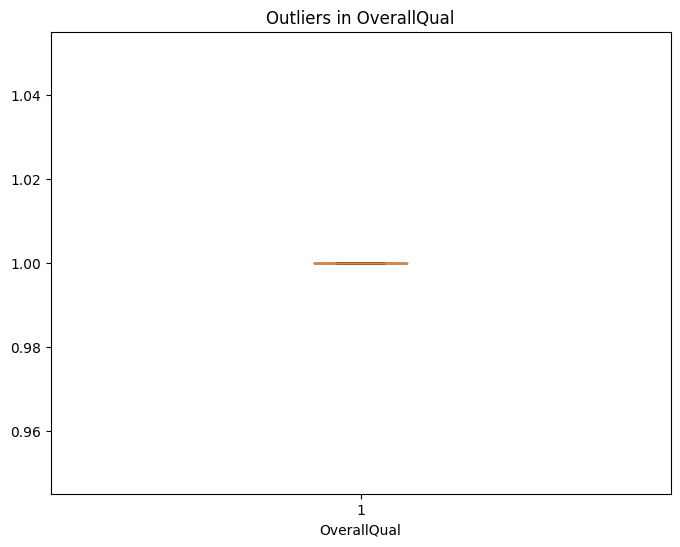

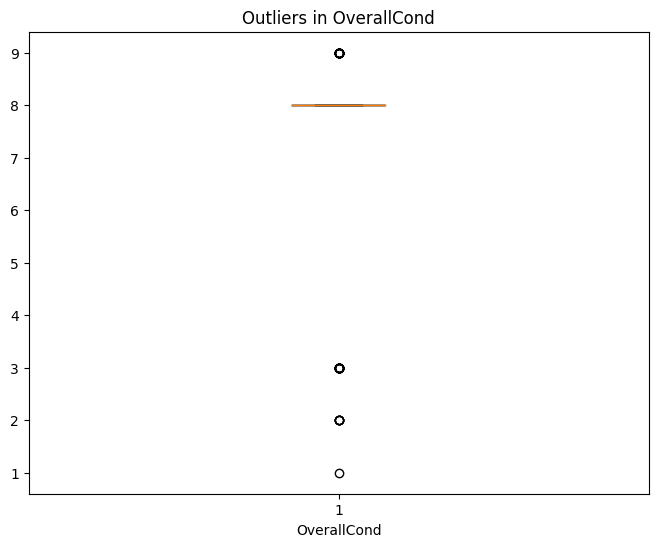

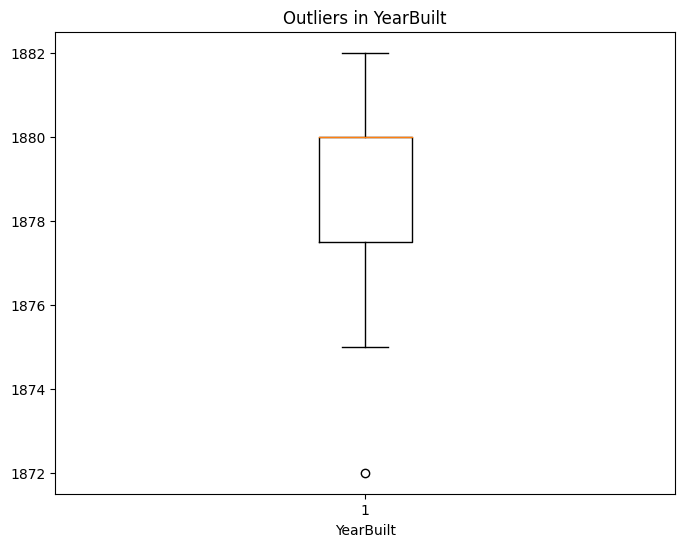

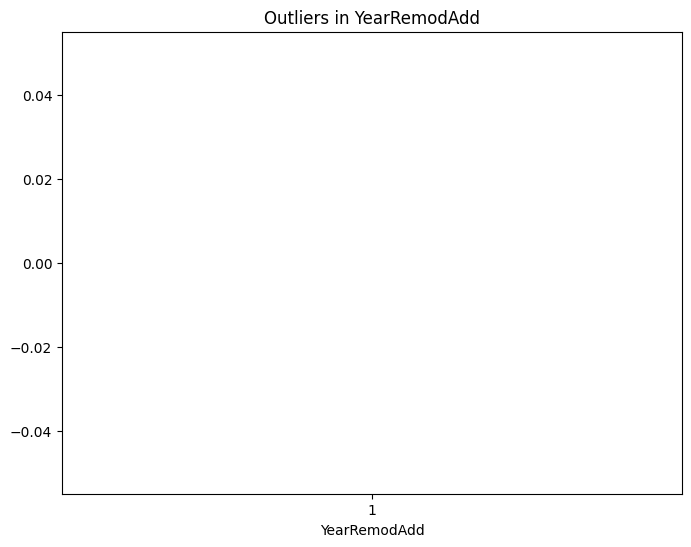

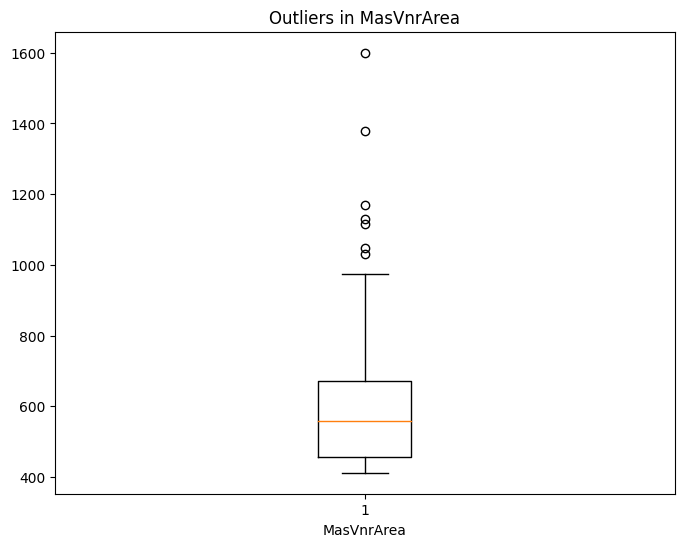

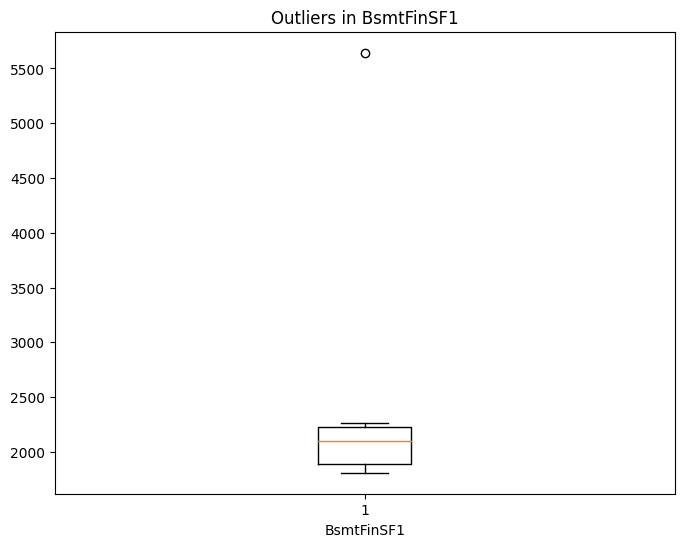

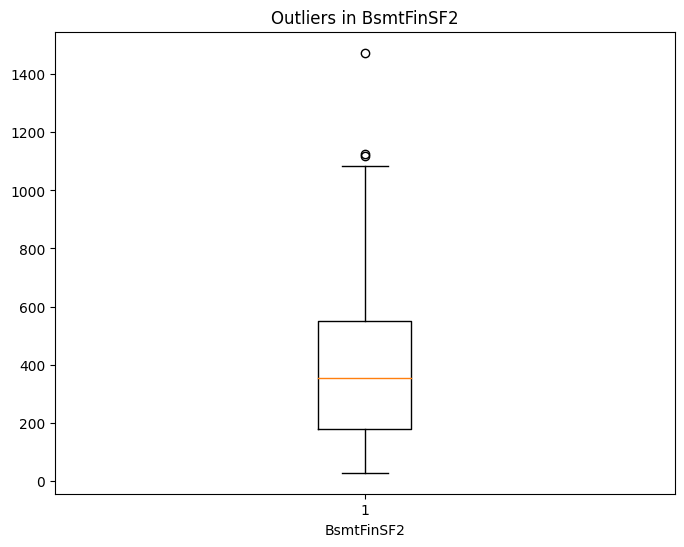

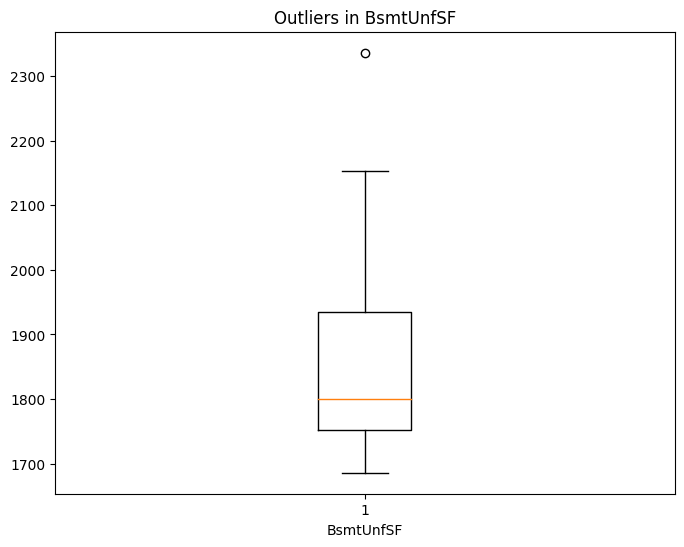

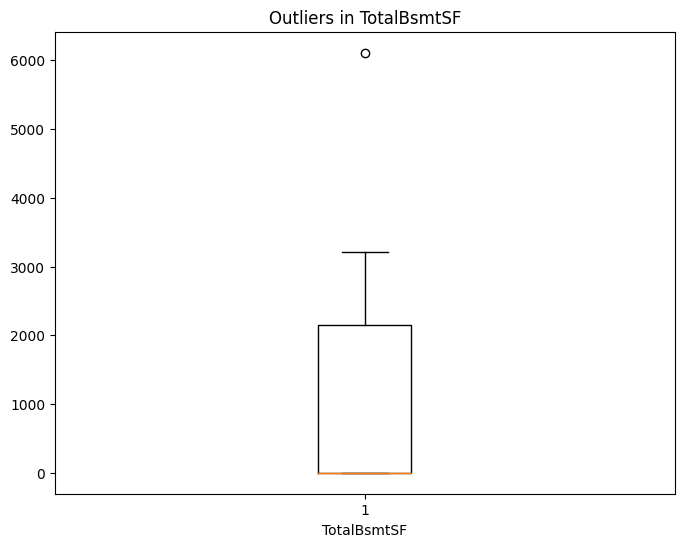

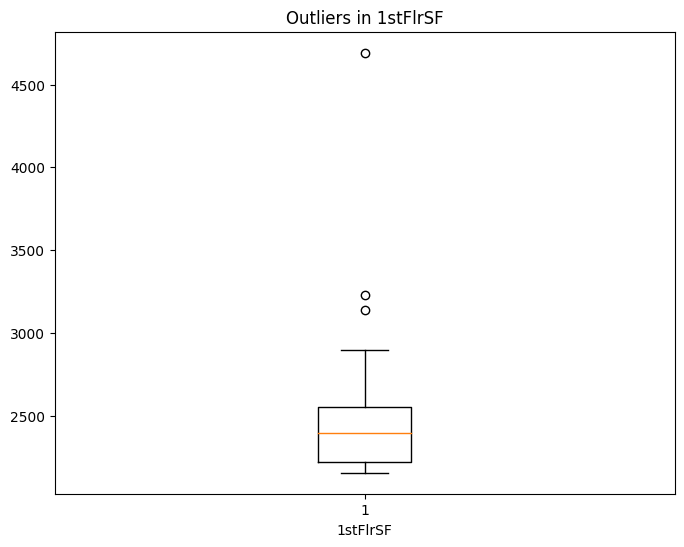

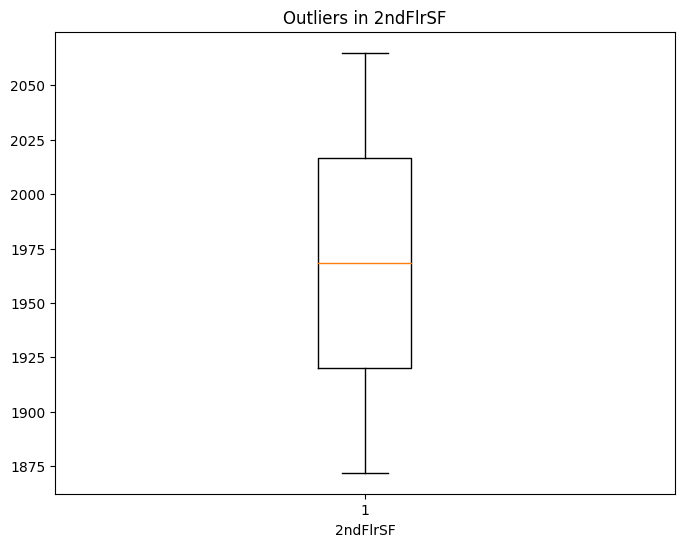

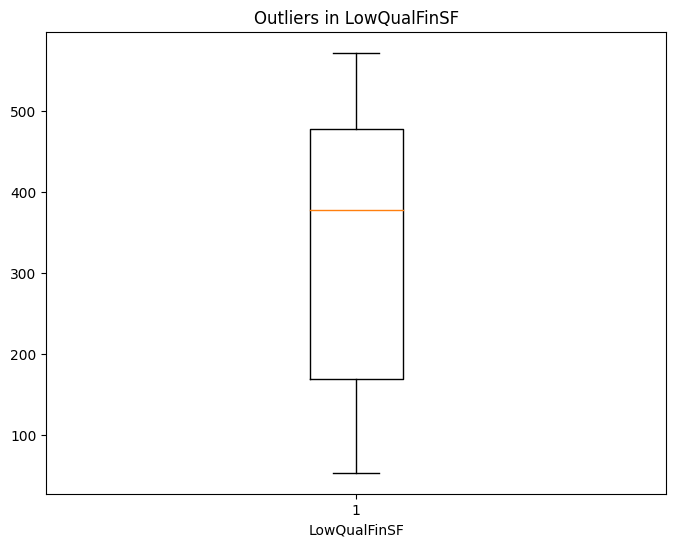

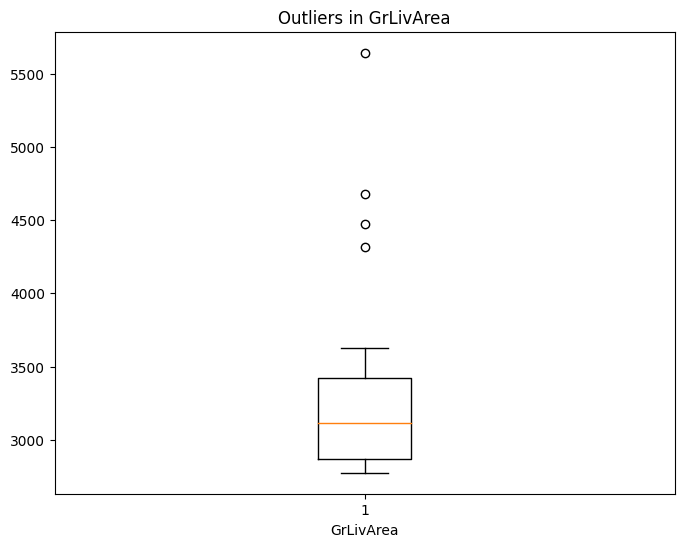

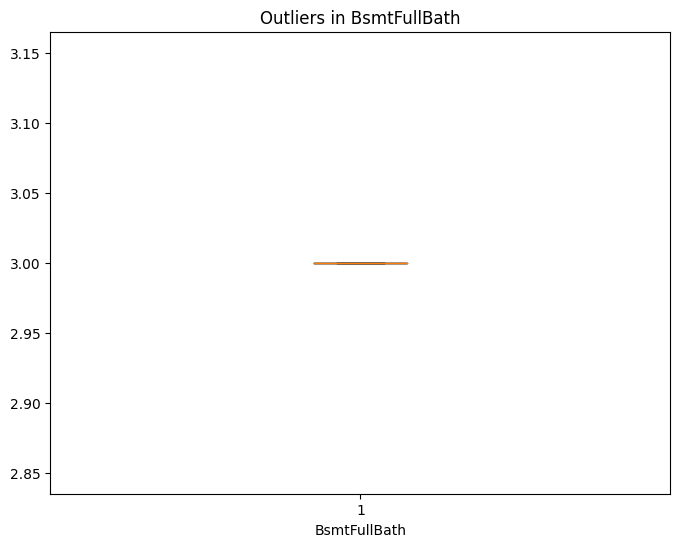

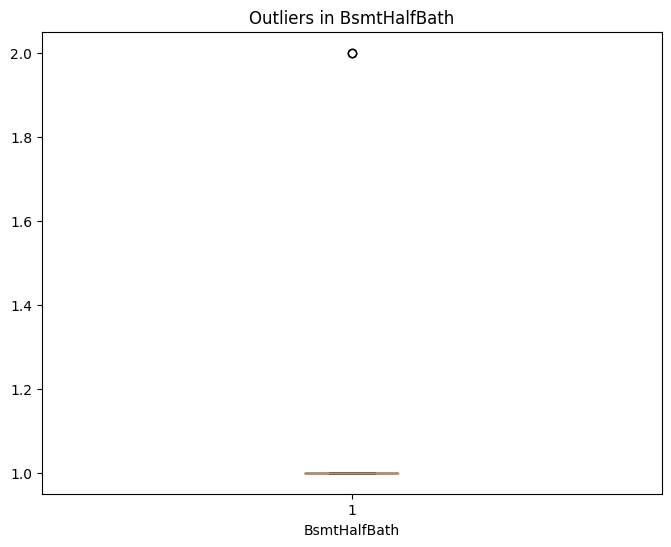

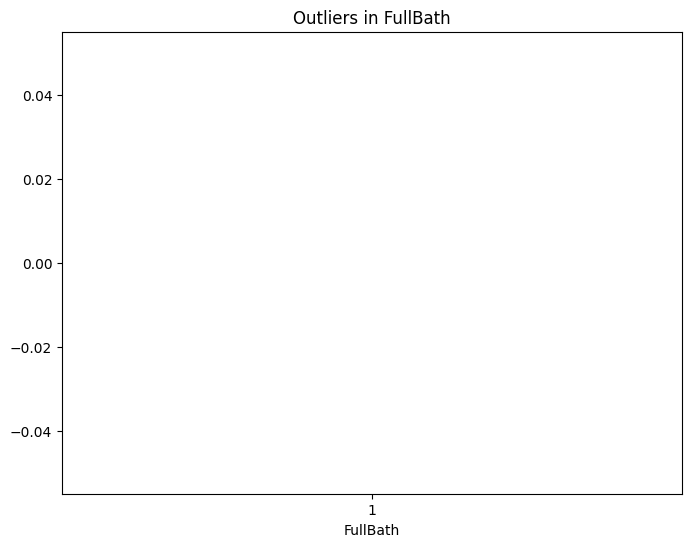

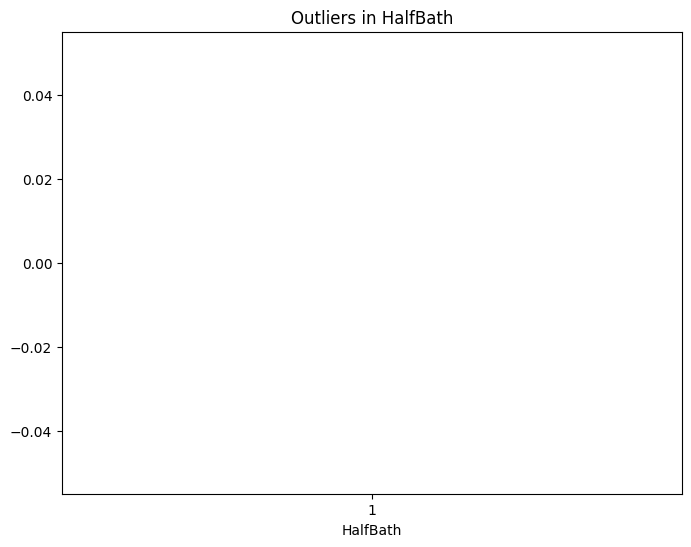

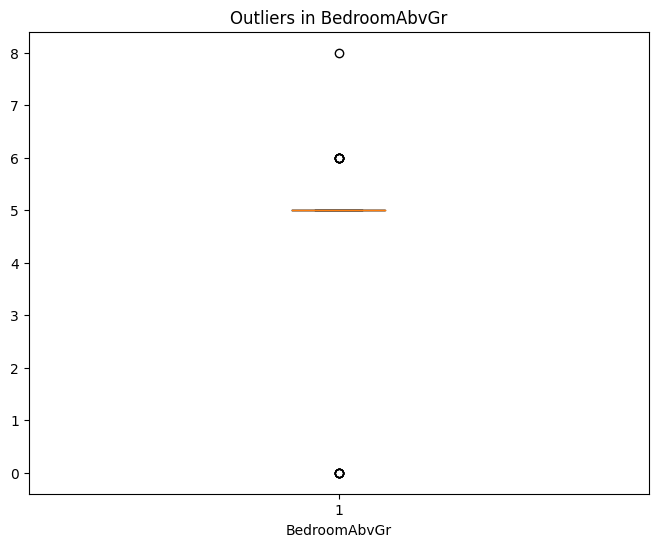

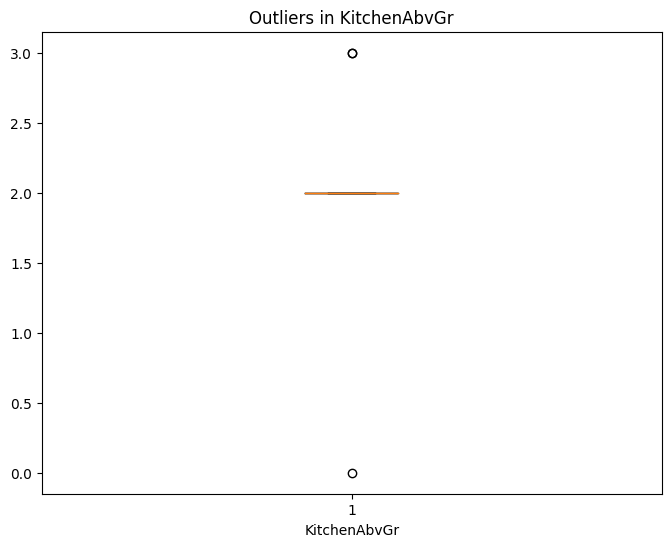

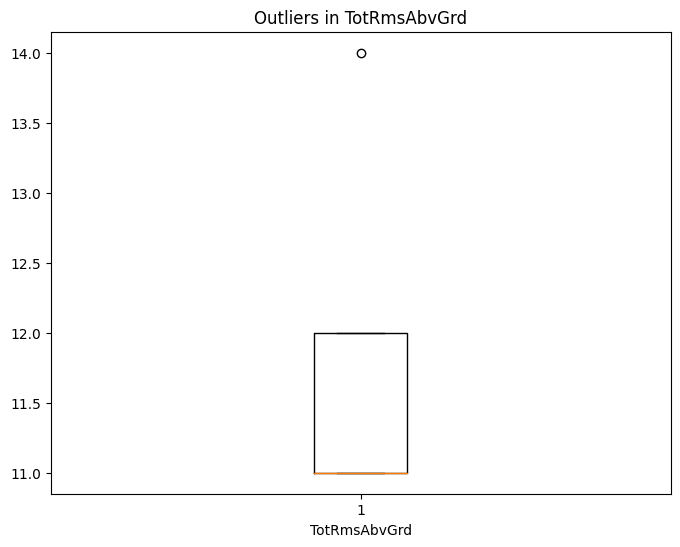

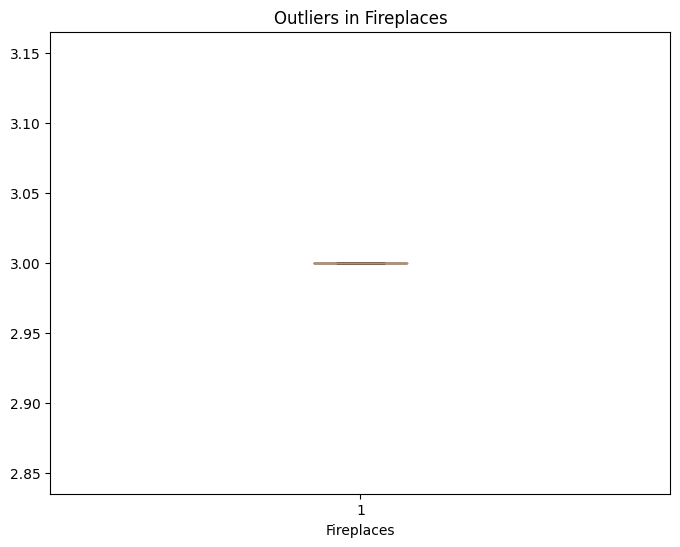

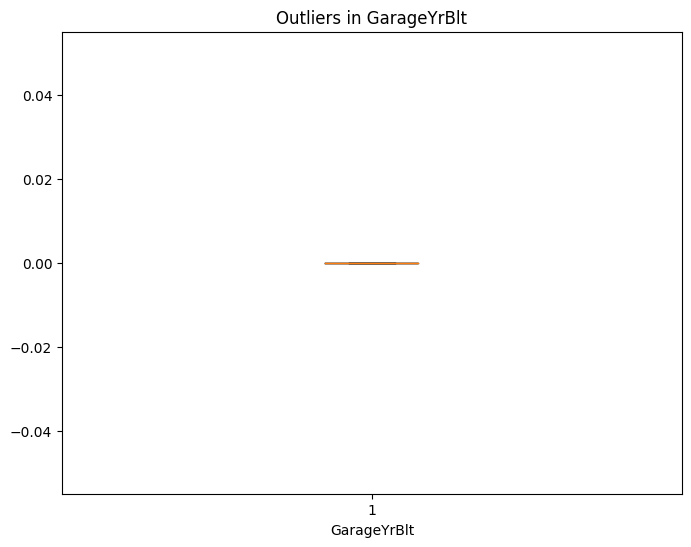

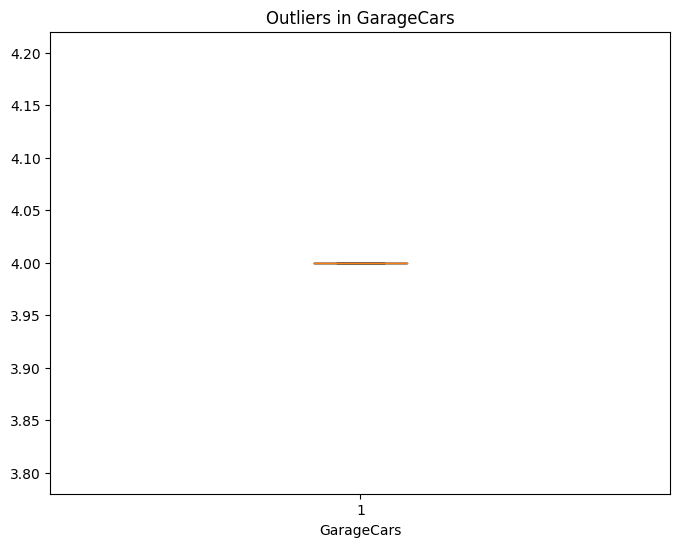

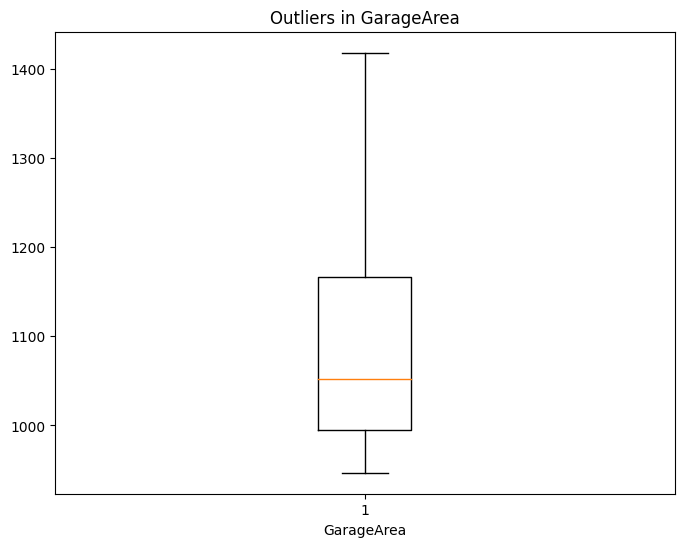

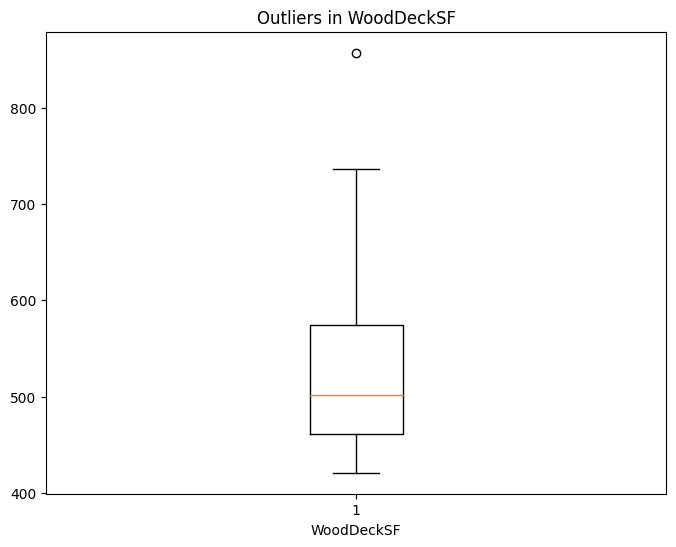

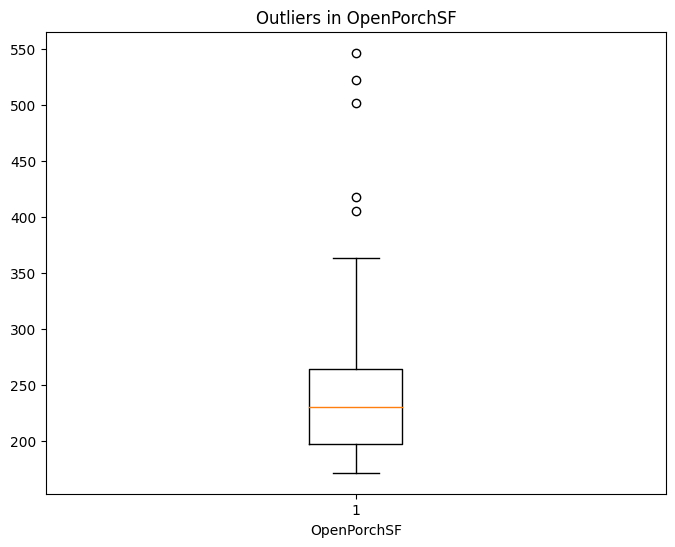

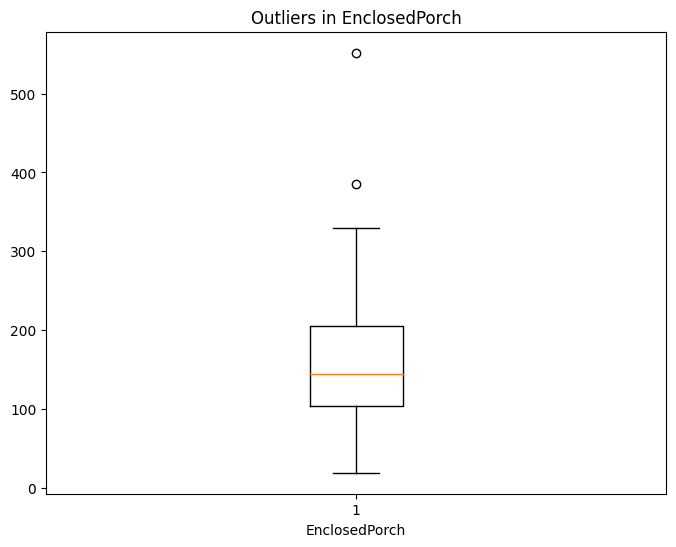

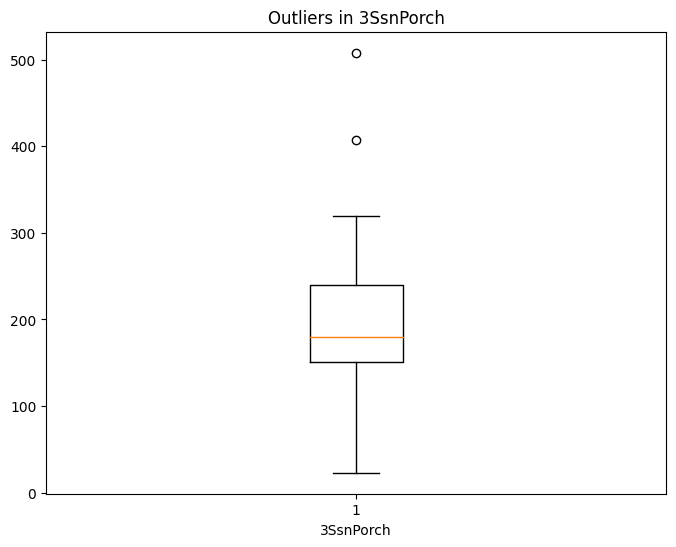

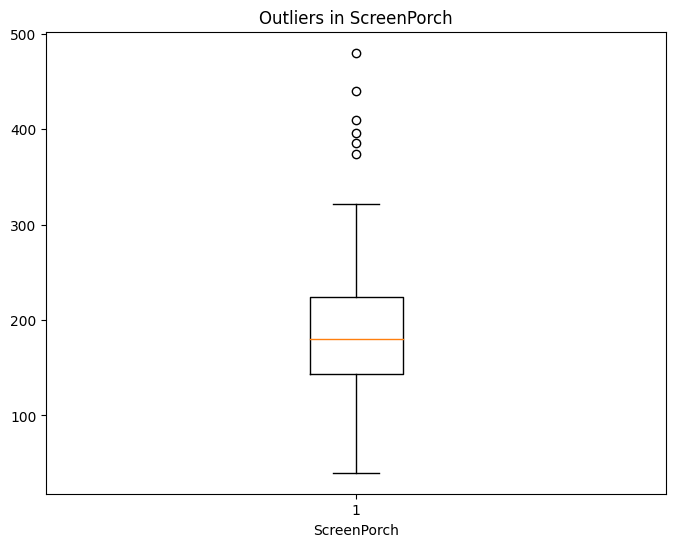

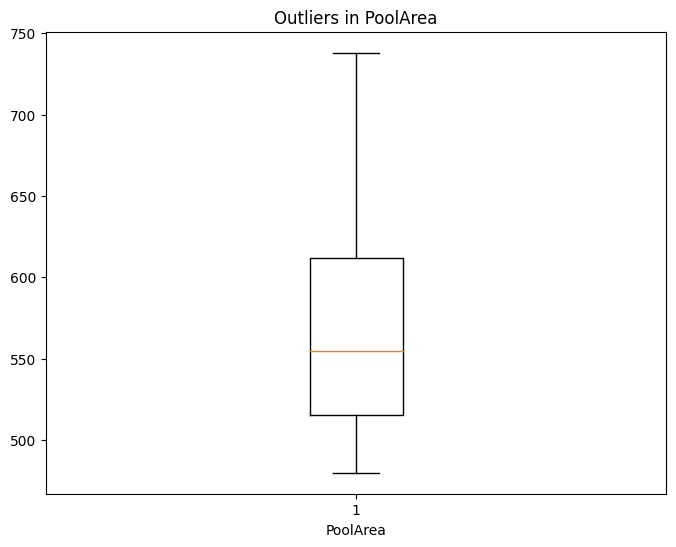

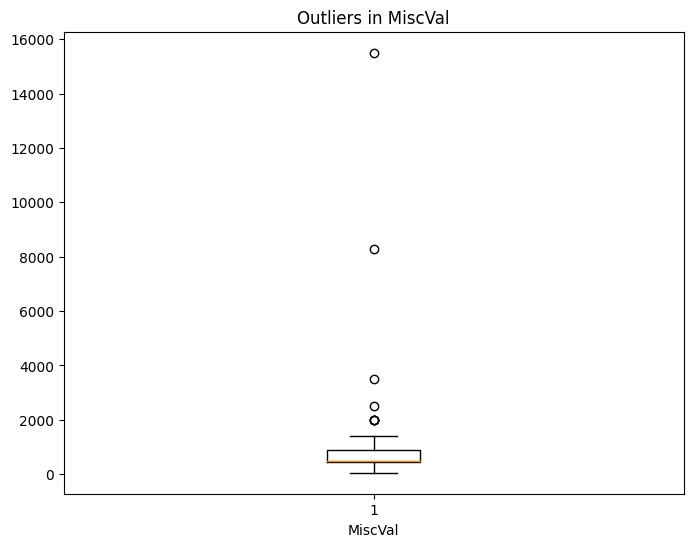

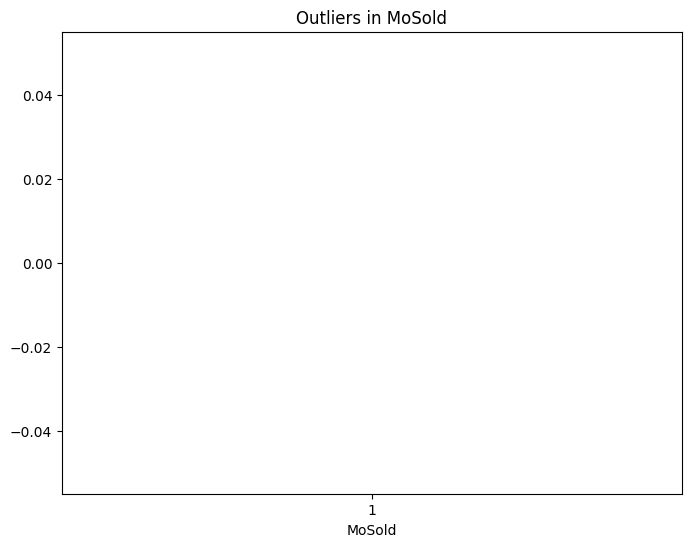

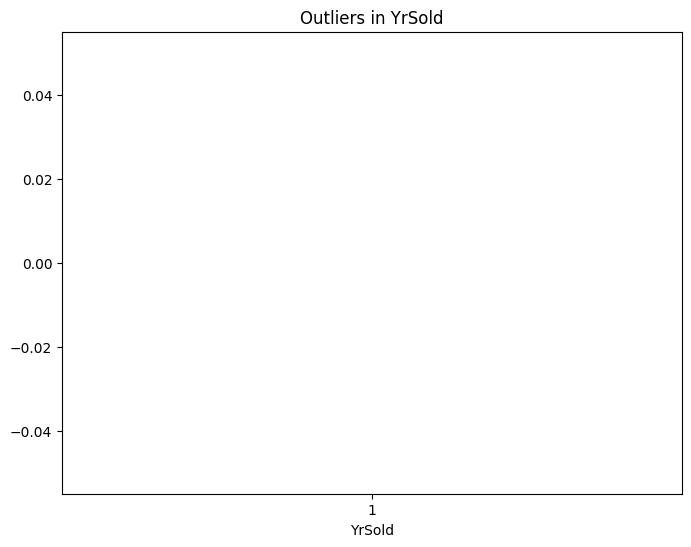

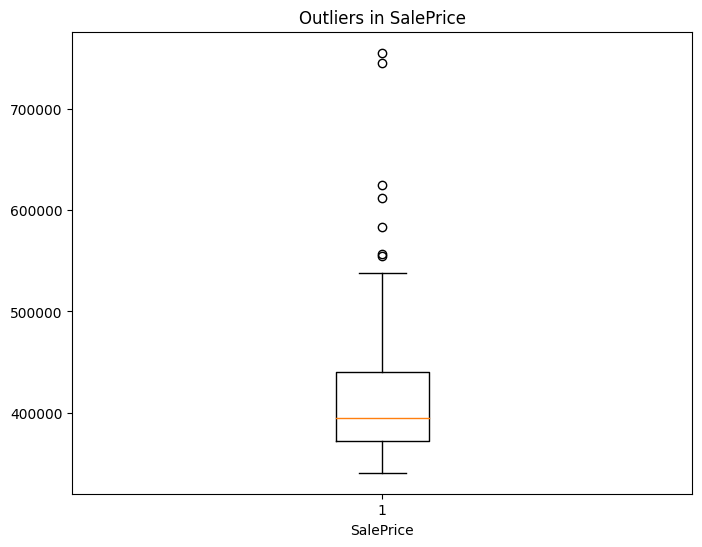

In [22]:
import matplotlib.pyplot as plt

# Memilih kolom-kolom numerik dalam DataFrame dfnew
numerical_columns = dfnew.select_dtypes(include=['int', 'float'])

# Menggambar plot untuk setiap kolom numerik dengan outlier
for column in numerical_columns.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(dfnew[column][outliers[column]])
    plt.title(f'Outliers in {column}')
    plt.xlabel(column)
    plt.show()

Handling outlier Lot Area

In [23]:
def OutLotArea(dfnew):
   q1=dfnew.quantile(0.25)
   q3=dfnew.quantile(0.75)
   IQR=q3-q1
   upper = dfnew[~(dfnew>(q3+1.5*IQR))].max()
   lower = dfnew[~(dfnew<(q1-1.5*IQR))].min()
   dfnew = np.where(dfnew > upper,dfnew.median(),
       np.where(
           dfnew <= lower, dfnew.median(),
           dfnew
           )
       )
   return dfnew

,LotArea
count,1460.000000
mean,9287.741781
std,3113.857906
min,1526.000000
25%,7572.750000
50%,9478.500000
75%,11107.250000
max,17671.000000


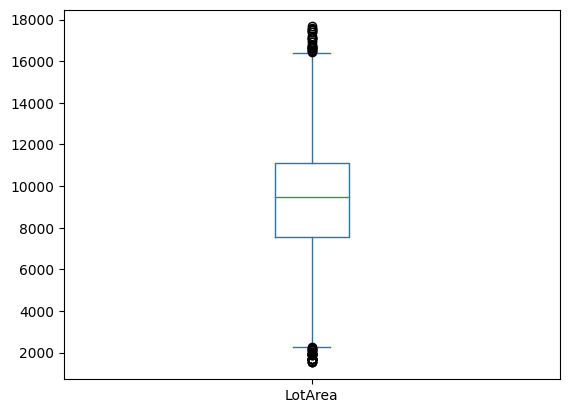

In [24]:
dfnew['LotArea'] =OutLotArea(dfnew['LotArea'])
dfnew['LotArea'].plot(kind='box', subplots=True)
dfnew['LotArea'].describe()

Handling Outlier SalePrice

In [25]:
def outPrice(row):
    if row['LotArea'] < 9329.920193 and row['SalePrice'] >= 375000:
        return np.percentile(dfnew['SalePrice'], 25)
    elif row['LotArea'] >= 9329.920193  and row['LotArea'] < 9479.250000 and row['SalePrice'] >= 375000:
        return dfnew['SalePrice'].median()
    elif row['LotArea'] >= 9479.250000 and row['SalePrice'] >= 375000:
        return dfnew['SalePrice'].mean()
    else:
        return row['SalePrice']

# Memanggil fungsi w
dfnew['SalePrice'] = dfnew.apply(outPrice, axis=1)

,SalePrice
count,1460.000000
mean,172563.511277
std,61424.123145
min,34900.000000
25%,129956.250000
50%,162950.000000
75%,204187.500000
max,374000.000000


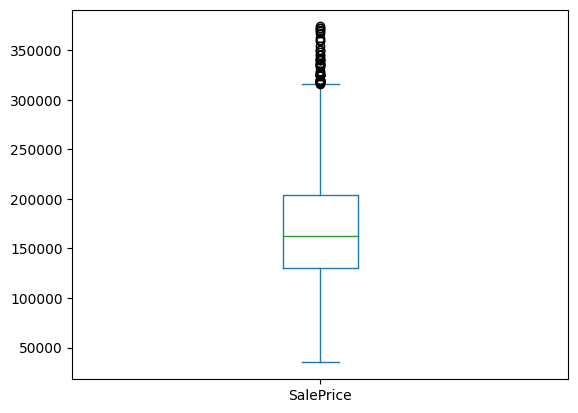

In [26]:
dfnew['SalePrice'].plot(kind='box')
dfnew['SalePrice'].describe()

Handling outlier dengan nilai median

In [27]:
def OutToMedian (dfnew):
    q1=dfnew.quantile(0.25)
    q3=dfnew.quantile(0.75)
    IQR=q3-q1
    upper = dfnew[~(dfnew>(q3+1.5*IQR))].max()
    lower = dfnew[~(dfnew<(q1-1.5*IQR))].min()
    dfnew = np.where(dfnew > upper,dfnew.median(),
       np.where(
           dfnew <= lower, dfnew.median(),
           dfnew
           )
       )
    return dfnew

Handling MasVnrArea

,MasVnrArea
count,1460.000000
mean,61.843836
std,103.955691
min,0.000000
25%,0.000000
50%,0.000000
75%,106.000000
max,410.000000


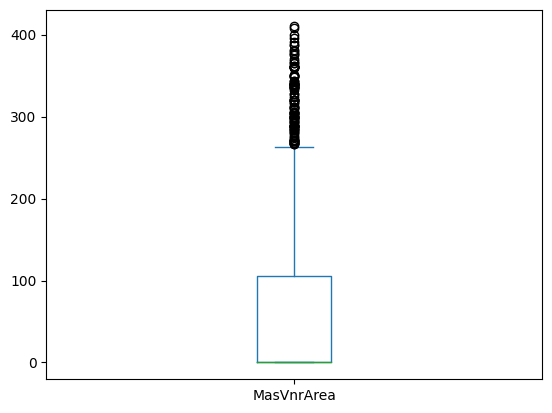

In [28]:
dfnew['MasVnrArea'] = OutToMedian(dfnew['MasVnrArea'])
dfnew['MasVnrArea'].plot(kind='box', subplots=True)
dfnew['MasVnrArea'].describe()



 Handling BsmtFinSF1

,BsmtFinSF1
count,1460.000000
mean,555.966438
std,323.524097
min,2.000000
25%,383.500000
50%,383.500000
75%,702.500000
max,1767.000000


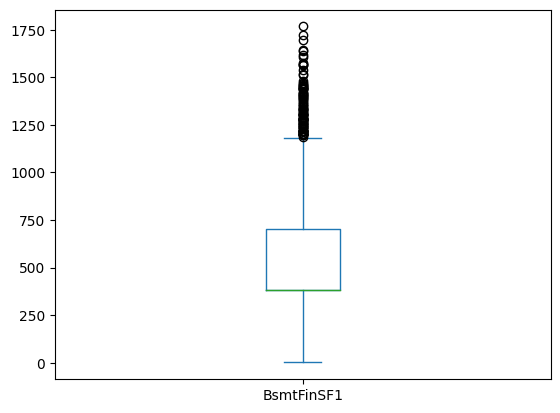

In [29]:
dfnew['BsmtFinSF1'] = OutToMedian(dfnew['BsmtFinSF1'])
dfnew['BsmtFinSF1'].plot(kind='box', subplots=True)
dfnew['BsmtFinSF1'].describe()

Handling BsmtFinSF2

,GrLivArea
count,1460.000000
mean,1477.254795
std,444.119677
min,438.000000
25%,1130.750000
50%,1464.000000
75%,1735.000000
max,2730.000000


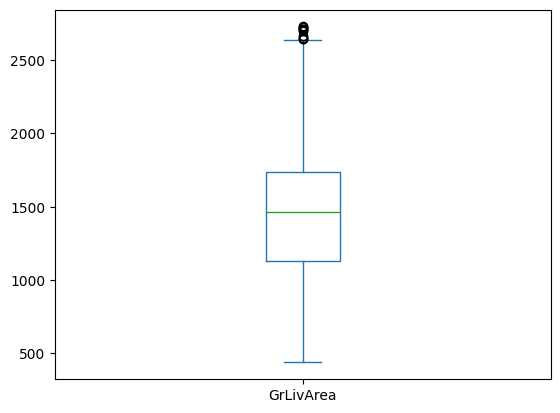

In [30]:
dfnew['GrLivArea'] = OutToMedian(dfnew['GrLivArea'])
dfnew['GrLivArea'].plot(kind='box', subplots=True)
dfnew['GrLivArea'].describe()

Handling OpenPorchSF

,OpenPorchSF
count,1460.000000
mean,46.189041
std,35.022834
min,4.000000
25%,25.000000
50%,25.000000
75%,56.000000
max,170.000000


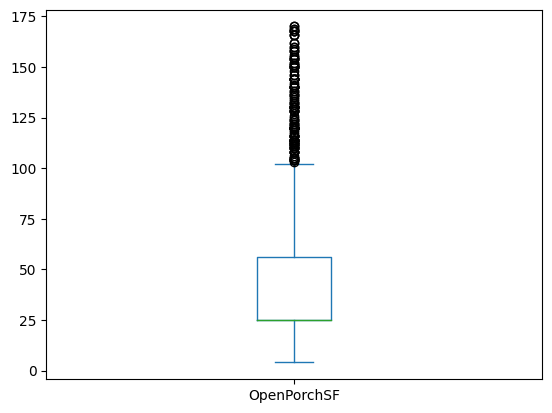

In [31]:
dfnew['OpenPorchSF'] = OutToMedian(dfnew['OpenPorchSF'])
dfnew['OpenPorchSF'].plot(kind='box', subplots=True)
dfnew['OpenPorchSF'].describe()

## Feature Engenering

In [32]:
dfnew['LotAreaM2'] = dfnew["LotArea"] / 10.764

In [33]:
dfnew ['GarageCar_m2'] = dfnew ['GarageCars'] / 10.764

In [34]:
import datetime

now = datetime.datetime.now()
nowyear= now.year
dfnew ['BuildingAge'] = nowyear - dfnew['YearBuilt']

In [35]:
dfnew ['RemoveAddAge'] = nowyear - dfnew['YearRemodAdd']

In [36]:
dfnew['CountBuild_m2'] = (dfnew['1stFlrSF'] + dfnew['2ndFlrSF'] + dfnew['TotalBsmtSF']) / 10.764

In [37]:
df_train = dfnew.copy()

# Data Test

In [38]:
df_test= pd.read_csv('drive/My Drive/MSIB5-DataSience/Dataset/test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## Handling missing value

In [39]:
#mengganti missing ke nilai median
median_LotFrontage = df_test['LotFrontage'].median()
df_test['LotFrontage'].fillna(median_LotFrontage, inplace=True)

<ipython-input-39-9e944590aeca>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['LotFrontage'].fillna(median_LotFrontage, inplace=True)


In [40]:
#mengganti missing ke nilai 0
df_test['GarageYrBlt'].fillna(0, inplace=True)

<ipython-input-40-ea1708d6260b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['GarageYrBlt'].fillna(0, inplace=True)


In [41]:
#mengganti NaN menjadi 'NothavePool'
df_test['PoolQC'].fillna("NotHavePool", inplace=True)

<ipython-input-41-ea96ee0f7fc7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['PoolQC'].fillna("NotHavePool", inplace=True)


In [42]:
df_test['MiscFeature'].fillna("NFeatureAdd", inplace=True)

<ipython-input-42-ebda5ab26186>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['MiscFeature'].fillna("NFeatureAdd", inplace=True)


In [43]:
df_test['Alley'].fillna("NAllay", inplace=True)

<ipython-input-43-f1f8e979e9b5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Alley'].fillna("NAllay", inplace=True)


In [44]:
df_test['Fence'].fillna("NFence", inplace=True)

<ipython-input-44-203c91a39373>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Fence'].fillna("NFence", inplace=True)


In [45]:
df_test['MasVnrType'].fillna("NVnr", inplace=True)

<ipython-input-45-f37d9e2cd2ca>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['MasVnrType'].fillna("NVnr", inplace=True)


In [46]:
#mengganti missing ke nilai 0
df_test['MasVnrArea'].fillna(0, inplace=True)

<ipython-input-46-34d48dc7c56c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['MasVnrArea'].fillna(0, inplace=True)


In [47]:
df_test['FireplaceQu'].fillna("NFireplace", inplace=True)

<ipython-input-47-19b947f4ac2e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['FireplaceQu'].fillna("NFireplace", inplace=True)


In [48]:
df_test['GarageType'].fillna("Ngarage", inplace=True)
df_test['GarageCond'].fillna("Ngarage", inplace=True)
df_test['GarageQual'].fillna("Ngarage", inplace=True)
df_test['GarageFinish'].fillna("Ngarage", inplace=True)

<ipython-input-48-88cda99a7d10>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['GarageType'].fillna("Ngarage", inplace=True)
<ipython-input-48-88cda99a7d10>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [49]:
df_test['BsmtFinType2'].fillna("NBsmt", inplace=True)
df_test['BsmtExposure'].fillna("NBsmt", inplace=True)
df_test['BsmtFinType1'].fillna("NBsmt", inplace=True)
df_test['BsmtQual'].fillna("NBsmt", inplace=True)
df_test['BsmtCond'].fillna("NBsmt", inplace=True)

<ipython-input-49-f08e7dfa874b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['BsmtFinType2'].fillna("NBsmt", inplace=True)
<ipython-input-49-f08e7dfa874b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [50]:
modusElec = df_test['Electrical'].mode()
df_test['Electrical'].fillna("modusElec", inplace=True)

<ipython-input-50-bbbe131ca5b7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Electrical'].fillna("modusElec", inplace=True)


In [51]:

mode_sale = df_test['SaleType'].mode()
df_test['SaleType'].fillna("mode_sale", inplace=True)

<ipython-input-51-3813ab426f0e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['SaleType'].fillna("mode_sale", inplace=True)


In [52]:
mode_sale = df_test['MSZoning'].mode()
df_test['MSZoning'].fillna("MSZoning", inplace=True)

<ipython-input-52-595337c7a726>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['MSZoning'].fillna("MSZoning", inplace=True)


In [53]:
for column in df_test.columns:
    mode_value = df_test[column].mode()[0]
    df_test[column].fillna(mode_value, inplace=True)

<ipython-input-53-7ab96fb5049d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test[column].fillna(mode_value, inplace=True)
<ipython-input-53-7ab96fb5049d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [54]:
df_test.isnull().sum().sort_values(ascending = False)

,0
Id,0
MSSubClass,0
GarageType,0
FireplaceQu,0
Fireplaces,0
...,...
MasVnrType,0
Exterior2nd,0
Exterior1st,0
RoofMatl,0


## Casting Type data

In [55]:
df_test['MSSubClass'] = df_test['MSSubClass'].astype('category')
df_test['MSZoning'] = df_test['MSZoning'].astype('category')
df_test['Street'] = df_test['Street'].astype('category')
df_test['Alley'] = df_test['Alley'].astype('category')
df_test['LandContour'] = df_test['LandContour'].astype('category')
df_test['Utilities'] = df_test['Utilities'].astype('category')
df_test['LotConfig'] = df_test['LotConfig'].astype('category')
df_test['LandSlope'] = df_test['LandSlope'].astype('category')
df_test['Neighborhood'] = df_test['Neighborhood'].astype('category')
df_test['Condition1'] = df_test['Condition1'].astype('category')
df_test['Condition2'] = df_test['Condition2'].astype('category')
df_test['BldgType'] = df_test['BldgType'].astype('category')
df_test['HouseStyle'] = df_test['HouseStyle'].astype('category')
df_test['RoofStyle'] = df_test['RoofStyle'].astype('category')
df_test['RoofMatl'] = df_test['RoofMatl'].astype('category')
df_test['Exterior1st'] = df_test['Exterior1st'].astype('category')
df_test['Exterior2nd'] = df_test['Exterior2nd'].astype('category')
df_test['MasVnrType'] = df_test['MasVnrType'].astype('category')
df_test['ExterQual'] = df_test['ExterQual'].astype('category')
df_test['ExterCond'] = df_test['ExterCond'].astype('category')
df_test['Foundation'] = df_test['Foundation'].astype('category')
df_test['BsmtQual'] = df_test['BsmtQual'].astype('category')
df_test[' BsmtCond'] = df_test['BsmtCond'].astype('category')
df_test['BsmtExposure'] = df_test['BsmtExposure'].astype('category')
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].astype('category')
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].astype('category')
df_test['Heating'] = df_test['Heating'].astype('category')
df_test['HeatingQC'] = df_test['HeatingQC'].astype('category')
df_test['CentralAir'] = df_test['CentralAir'].astype('category')
df_test['Electrical'] = df_test['Electrical'].astype('category')
df_test['KitchenQual'] = df_test['KitchenQual'].astype('category')
df_test['Functional'] = df_test['Functional'].astype('category')
df_test['FireplaceQu'] = df_test['FireplaceQu'].astype('category')
df_test['GarageType'] = df_test['GarageType'].astype('category')
df_test['GarageFinish'] = df_test['GarageFinish'].astype('category')
df_test['GarageQual'] = df_test['GarageQual'].astype('category')
df_test['PoolQC'] = df_test['PoolQC'].astype('category')
df_test['Fence'] = df_test['Fence'].astype('category')
df_test['MiscFeature'] = df_test['MiscFeature'].astype('category')
df_test['SaleType'] = df_test['SaleType'].astype('category')
df_test['SaleCondition'] = df_test['SaleCondition'].astype('category')
df_test['LotShape'] = df_test['LotShape'].astype('category')
df_test['GarageCond'] = df_test['GarageCond'].astype('category')
df_test['ExterQual'] = df_test['ExterQual'].astype('category')
df_test['BsmtQual'] = df_test['BsmtQual'].astype('category')
df_test['FireplaceQu'] = df_test['FireplaceQu'].astype('category')
df_test['GarageType'] = df_test['GarageType'].astype('category')
df_test['GarageQual'] = df_test['GarageQual'].astype('category')
df_test['SaleType'] = df_test['SaleType'].astype('category')

## Outlier

In [56]:
def OutLotArea(df_test):
   q1=df_test.quantile(0.25)
   q3=df_test.quantile(0.75)
   IQR=q3-q1
   upper = df_test[~(df_test>(q3+1.5*IQR))].max()
   lower = df_test[~(df_test<(q1-1.5*IQR))].min()
   df_test = np.where(df_test > upper,df_test.median(),
       np.where(
           df_test <= lower, df_test.median(),
           df_test
           )
       )
   return df_test

,LotArea
count,1459.000000
mean,9167.839616
std,3196.609717
min,1476.000000
25%,7396.000000
50%,9399.000000
75%,11026.000000
max,17597.000000


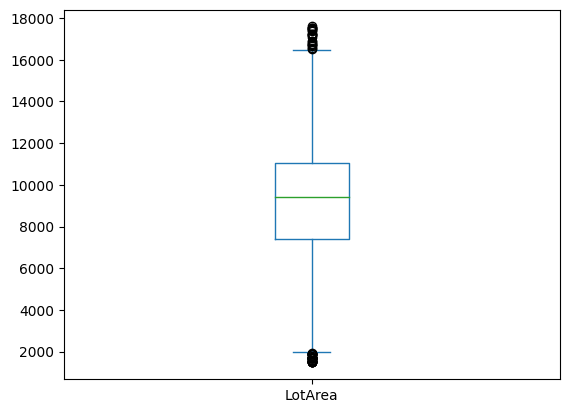

In [57]:
df_test['LotArea'] =OutLotArea(df_test['LotArea'])
df_test['LotArea'].plot(kind='box', subplots=True)
df_test['LotArea'].describe()

In [58]:
def OutToMedian (df_test):
    q1=df_test.quantile(0.25)
    q3=df_test.quantile(0.75)
    IQR=q3-q1
    upper = df_test[~(df_test>(q3+1.5*IQR))].max()
    lower = df_test[~(df_test<(q1-1.5*IQR))].min()
    df_test = np.where(df_test > upper,df_test.median(),
       np.where(
           df_test <= lower, df_test.median(),
           df_test
           )
       )
    return df_test

,MasVnrArea
count,1459.000000
mean,57.238520
std,99.675698
min,0.000000
25%,0.000000
50%,0.000000
75%,94.500000
max,405.000000


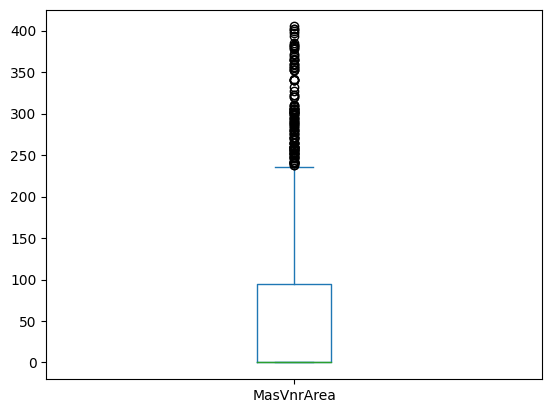

In [59]:
df_test['MasVnrArea'] = OutToMedian(df_test['MasVnrArea'])
df_test['MasVnrArea'].plot(kind='box', subplots=True)
df_test['MasVnrArea'].describe()

,BsmtFinSF1
count,1459.000000
mean,538.949966
std,340.837755
min,16.000000
25%,350.000000
50%,350.000000
75%,742.500000
max,1836.000000


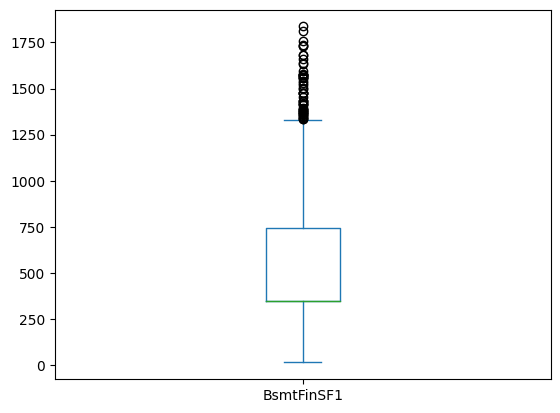

In [60]:
df_test['BsmtFinSF1'] = OutToMedian(df_test['BsmtFinSF1'])
df_test['BsmtFinSF1'].plot(kind='box', subplots=True)
df_test['BsmtFinSF1'].describe()

,GrLivArea
count,1459.000000
mean,1442.687457
std,409.743547
min,492.000000
25%,1118.500000
50%,1432.000000
75%,1677.500000
max,2592.000000


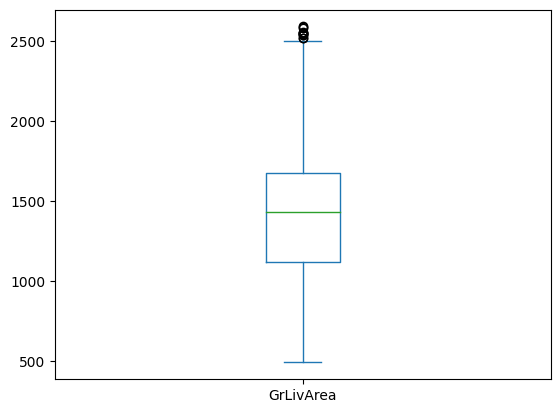

In [61]:
df_test['GrLivArea'] = OutToMedian(df_test['GrLivArea'])
df_test['GrLivArea'].plot(kind='box', subplots=True)
df_test['GrLivArea'].describe()

,OpenPorchSF
count,1459.000000
mean,48.479095
std,35.070125
min,6.000000
25%,28.000000
50%,28.000000
75%,57.000000
max,180.000000


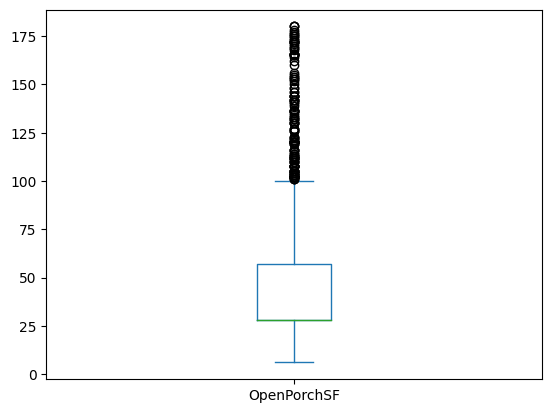

In [62]:
df_test['OpenPorchSF'] = OutToMedian(df_test['OpenPorchSF'])
df_test['OpenPorchSF'].plot(kind='box', subplots=True)
df_test['OpenPorchSF'].describe()

## OneHot Encoding

## Feature Enginering

In [63]:
df_test['LotAreaM2'] = df_test["LotArea"] / 10.764


df_test['GarageCar_m2'] = df_test['GarageCars'] / 10.764

import datetime

now = datetime.datetime.now()
nowyear= now.year
df_test['BuildingAge'] = nowyear - df_test['YearBuilt']


df_test ['RemoveAddAge'] = nowyear - df_test['YearRemodAdd']



df_test['CountBuild_m2'] = (df_test['1stFlrSF'] + df_test['2ndFlrSF'] + df_test['TotalBsmtSF']) / 10.764




In [64]:
df_final = pd.concat([df_train,df_test],axis=0)

In [65]:
TestOtwEncoding = ['MSSubClass','MSZoning','Street','LotShape','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','BsmtQual','BsmtCond','Heating','HeatingQC'
                       ,'CentralAir','Electrical','KitchenQual','Functional','GarageCond','SaleType','SaleCondition']

In [66]:
from sklearn.preprocessing import OneHotEncoder
df_final= pd.get_dummies(df_final, columns=TestOtwEncoding, prefix=TestOtwEncoding, dtype=int)

In [67]:
objec2= df_final.select_dtypes(include=['object']).columns
df_final = df_final.drop(columns=objec2)

categorical2 = df_final.select_dtypes(include=['category']).columns
df_final = df_final.drop(columns=categorical2)

In [68]:
df_final= df_final.loc[ : ,~df_final.columns.duplicated()]

In [69]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Columns: 168 entries, Id to SaleCondition_Partial
dtypes: float64(18), int64(150)
memory usage: 3.8 MB


# Modeling

In [73]:
#membuat data train dan test
train = df_final.iloc[ :1022, : ]
test1 = df_final.iloc[ 1022:1460, : ]
test2 = df_final.iloc[1460 : , : ].drop(['SalePrice'], axis=1)

In [75]:
X_train = train.drop(['SalePrice'], axis=1)
y_train = train['SalePrice']

rendom fores and decision tree

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Memisahkan fitur dan label
X = train.drop(columns=['SalePrice'])
y = train['SalePrice']

# Membagi data menjadi data pelatihan dan data pengujian (80% pelatihan, 20% pengujian)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Inisialisasi model Decision Tree
decision_tree = DecisionTreeRegressor(random_state=42)

# Melatih model Decision Tree
decision_tree.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred_decision_tree = decision_tree.predict(X_test)

In [77]:
X_train

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_mode_sale,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
137,138,82.0,11070.0,7,5,1988,1989,70.0,383.5,0.0,...,0,0,1,0,0,0,0,1,0,0
800,801,79.0,12798.0,6,5,1997,1997,0.0,462.0,0.0,...,0,0,1,0,0,0,0,0,1,0
934,935,313.0,9478.5,7,7,1960,2007,0.0,425.0,0.0,...,0,0,1,0,0,0,0,0,1,0
823,824,60.0,9900.0,6,7,1940,1950,0.0,383.5,0.0,...,0,0,1,0,0,0,0,0,1,0
849,850,80.0,9600.0,6,7,1976,1994,360.0,383.5,0.0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,60.0,10800.0,4,7,1885,1995,0.0,383.5,0.0,...,0,0,1,0,0,0,0,0,1,0
270,271,84.0,10728.0,8,5,2006,2006,0.0,383.5,0.0,...,1,0,0,0,0,0,0,0,0,1
860,861,55.0,7642.0,7,8,1918,1998,0.0,383.5,0.0,...,0,0,1,0,0,0,0,0,1,0
435,436,43.0,10667.0,7,6,1996,1996,0.0,385.0,344.0,...,0,0,0,0,0,0,0,0,1,0


In [79]:
from sklearn.metrics import mean_absolute_error
MAEDecision3 = mean_absolute_error(y_train, y_pred_decision_tree)
print('MAE: %.3f' % MAEDecision3)

ValueError: Found input variables with inconsistent numbers of samples: [817, 205]

## Use XGBRegressor

In [80]:
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [81]:
test1.drop('SalePrice', axis=1, inplace=True)

<ipython-input-81-7dbe04f56181>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1.drop('SalePrice', axis=1, inplace=True)


In [82]:
y_pred = classifier.predict(test1)

In [83]:
test1['PredictPrice'] = y_pred
test1.head()

<ipython-input-83-e7e7d8d459ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['PredictPrice'] = y_pred


,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_Oth,SaleType_WD,SaleType_mode_sale,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,PredictPrice
1022,1023,52.0,9439.0,5,5,1930,1950,0.0,324.0,0.0,...,0,1,0,0,0,0,0,1,0,118408.773438
1023,1024,43.0,3182.0,7,5,2005,2006,14.0,16.0,0.0,...,0,1,0,0,0,0,0,1,0,195612.453125
1024,1025,69.0,15498.0,8,6,1976,1976,0.0,1165.0,400.0,...,0,0,0,1,0,0,0,0,0,251243.078125
1025,1026,70.0,7700.0,5,5,1972,1972,0.0,138.0,468.0,...,0,1,0,0,0,0,0,1,0,120828.882812
1026,1027,73.0,9300.0,5,5,1960,1960,324.0,697.0,0.0,...,0,1,0,0,0,0,0,1,0,147947.406250


In [84]:
df_train[['Id','SalePrice']].iloc[1022 : 1460]

,Id,SalePrice
1022,1023,87000.0
1023,1024,191000.0
1024,1025,287000.0
1025,1026,112500.0
1026,1027,167500.0
...,...,...
1455,1456,175000.0
1456,1457,210000.0
1457,1458,266500.0
1458,1459,142125.0


In [85]:
test1[['Id','PredictPrice']]

,Id,PredictPrice
1022,1023,118408.773438
1023,1024,195612.453125
1024,1025,251243.078125
1025,1026,120828.882812
1026,1027,147947.406250
...,...,...
1455,1456,182061.015625
1456,1457,219026.625000
1457,1458,275373.906250
1458,1459,135816.625000


### Present real SalePrice a nd PredictPric

In [86]:
RealXPredict = df_train[['Id','SalePrice']].iloc[1022 : 1460].merge(test1[['Id','PredictPrice']], on='Id', how='inner')

In [87]:
RealXPredict

,Id,SalePrice,PredictPrice
0,1023,87000.0,118408.773438
1,1024,191000.0,195612.453125
2,1025,287000.0,251243.078125
3,1026,112500.0,120828.882812
4,1027,167500.0,147947.406250
...,...,...,...
433,1456,175000.0,182061.015625
434,1457,210000.0,219026.625000
435,1458,266500.0,275373.906250
436,1459,142125.0,135816.625000


### MAE

In [88]:
test1 ['Residual'] = dfnew['SalePrice'] - test1['PredictPrice']

<ipython-input-88-137ac514c192>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1 ['Residual'] = dfnew['SalePrice'] - test1['PredictPrice']


In [89]:
test1['Abs'] = abs(test1['Residual'])

<ipython-input-89-ecc3e05c9b60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['Abs'] = abs(test1['Residual'])


In [90]:
MAEXGB = np.mean(test1['Abs'])
MAEXGB

18788.971367727492

In [92]:
#menggunkaan data train only
df_final = df_final.iloc[ :1460, : ]

### Evaluasi menggunakan feature selection (XGBRegresorr)

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [94]:
X = df_final.drop(columns=['SalePrice'])
y = df_final['SalePrice']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [96]:
#memilih feature terbaik20
f_best = SelectKBest(score_func=f_regression, k=20)
X_train_fbest = f_best.fit_transform(X_train, y_train)
X_test_fbest = f_best.transform(X_test)

In [97]:
#use XGBREGRESOR
model = XGBRegressor()
model.fit(X_train_fbest, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [98]:
y_pred_fbest = model.predict(X_test_fbest)

In [99]:
#  predictions linier pearson correlation (liner regresi)
MaeXGB_Fbest = mean_absolute_error(y_test, y_pred_fbest)
print('MAE: %.3f' % MaeXGB_Fbest)

MAE: 20289.961


## Use Linier Regression

In [100]:
df_final.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleType_mode_sale',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=168)

### Using Pearson Correlation methode (linier regresion)

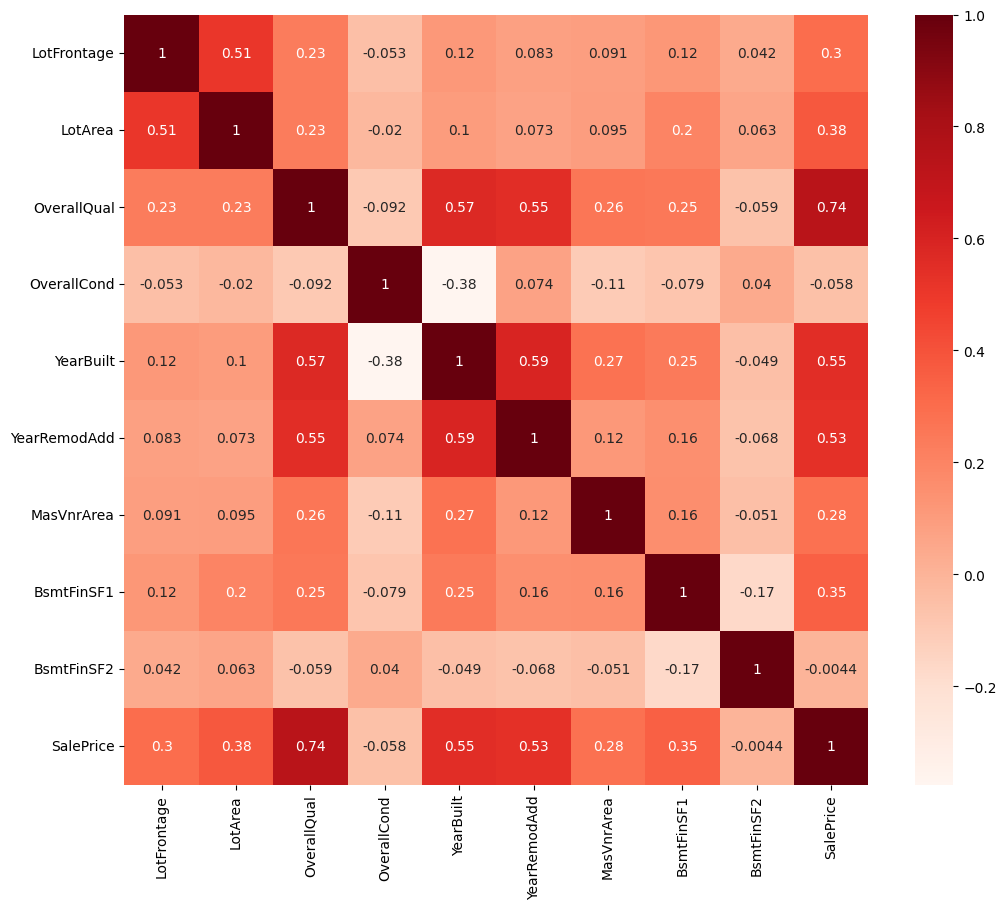

In [101]:
import seaborn as sns
plt.figure(figsize=(12,10))
correlation = df_final[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2','SalePrice']].corr()
sns.heatmap(correlation , annot=True, cmap=plt.cm.Reds)
plt.show()

In [102]:
#modeling using linear regression
# evaluation of a model using all input features
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
model = LinearRegression()

In [103]:
df_train = df_final[~df_final['SalePrice'].isna()]
df_test = df_final[df_final['SalePrice'].isna()]

In [104]:
#separate X,y Train
X=df_train.drop(['SalePrice'],axis=1)
y=df_train['SalePrice']

In [105]:
#Adding constant column of ones, mandatory for sm.OLS model
import statsmodels.api as sm
X_1 = sm.add_constant(X)
bool_columns = X_1.select_dtypes(include=['bool']).columns
X_1[bool_columns] = X_1[bool_columns].astype(int)
# Fitting sm.OLS model

model = sm.OLS(y,X_1).fit()
model.pvalues

,0
const,1.976475e-01
Id,3.582612e-01
LotFrontage,3.259550e-01
LotArea,9.473214e-05
OverallQual,1.197163e-07
...,...
SaleCondition_AdjLand,9.742289e-01
SaleCondition_Alloca,1.252856e-02
SaleCondition_Family,2.256053e-01
SaleCondition_Normal,6.498657e-01


In [106]:
model.pvalues.sort_values(ascending = False)

,0
HeatingQC_Fa,9.993988e-01
PoolArea,9.762497e-01
SaleCondition_AdjLand,9.742289e-01
Electrical_Mix,9.732069e-01
SaleType_New,9.634338e-01
...,...
BsmtFinSF1,1.696444e-06
Condition2_PosA,1.514136e-07
OverallQual,1.197163e-07
GrLivArea,8.164158e-35


In [107]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'OpenPorchSF', 'ScreenPorch', 'LotAreaM2', 'MSSubClass_60', 'MSSubClass_160', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RM', 'LotShape_IR1', 'Condition1_Artery', 'Condition1_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'HouseStyle_1Story', 'BsmtQual_Ex', 'BsmtQual_Gd', 'Heating_OthW', 'KitchenQual_Gd', 'Functional_Sev', 'Functional_Typ', 'SaleType_Con', 'SaleType_ConLI', 'SaleCondition_Abnorml', 'SaleCondition_Alloca']


In [108]:
#selected features by backward
df_selected = X[selected_features_BE]

In [109]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_selected,y, test_size=0.33, random_state=1)

In [110]:
#predict using all features, fitting model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [111]:
# evaluate the model
yhat = model.predict(X_test)

In [112]:
#  predictions linier pearson correlation (liner regresi)
maecorrelatioan = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % maecorrelatioan)

MAE: 20992.514


### Feature importance method (linier regresion)

In [113]:
#Feature importance
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 72864.231136
Best score using built-in LassoCV: 0.701240


In [114]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 19 variables and eliminated the other 148 variables


In [115]:
coef.sort_values(ascending=False).head(10)

,0
YearRemodAdd,360.088517
YearBuilt,322.491708
OpenPorchSF,55.138733
GrLivArea,51.860017
GarageArea,34.621786
ScreenPorch,32.900997
BsmtFinSF1,28.457573
MasVnrArea,17.730524
WoodDeckSF,17.173855
BsmtFinSF2,13.767122


Text(0.5, 1.0, 'Feature importance using Lasso Model')

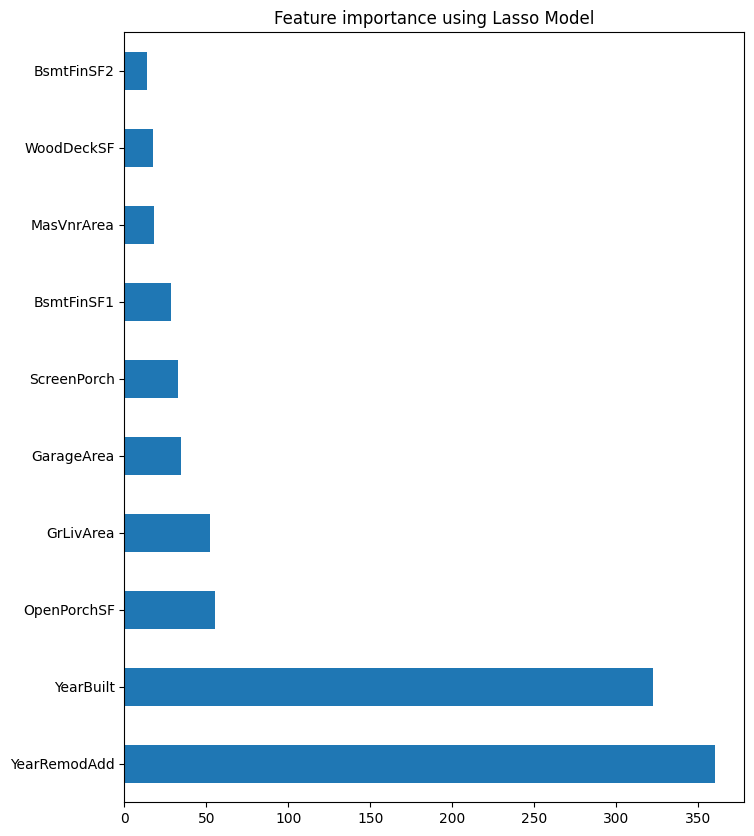

In [116]:
imp_coef = coef.sort_values(ascending=False).head(10)
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [117]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=1)

In [118]:
#predict using all features, fitting model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [119]:
# evaluate the model
yhat2 = model.predict(X_test)

In [120]:
# evaluate predictions
maeimportance = mean_absolute_error(y_test, yhat2)
print('MAE: %.3f' % maeimportance)

MAE: 22738.245


### Use Feature Selection (linier regresion)

In [121]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [122]:
def select_features(X_train, y_train, X_test):
 # configure to select a subset of features
 fs = SelectKBest(score_func=f_regression, k=137)
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

In [123]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [124]:
pd.DataFrame(X_train_fs)

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,136
0,105.0,11249.0,6.0,5.0,1995.0,1995.0,0.0,334.0,322.0,1200.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,54.0,7244.0,5.0,7.0,1970.0,1970.0,0.0,619.0,149.0,768.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,78.0,10140.0,7.0,5.0,1976.0,1976.0,0.0,194.0,638.0,832.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,69.0,9303.0,6.0,5.0,1996.0,1997.0,42.0,742.0,130.0,872.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,60.0,6600.0,5.0,4.0,1892.0,1965.0,0.0,383.5,994.0,994.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,78.0,10140.0,6.0,5.0,1974.0,1974.0,174.0,383.5,1064.0,1064.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
974,80.0,9920.0,5.0,5.0,1954.0,1954.0,110.0,354.0,412.0,1056.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
975,60.0,6882.0,6.0,7.0,1914.0,2006.0,0.0,383.5,684.0,684.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
976,21.0,1680.0,6.0,3.0,1971.0,1971.0,0.0,358.0,125.0,483.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [125]:
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat3 = model.predict(X_test_fs)
# evaluate predictions
maefeatureselection = mean_absolute_error(y_test, yhat3)
print('MAE: %.3f' % maefeatureselection)

MAE: 22481.222


## Use SVM Regresor

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [127]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [128]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)
# Lakukan prediksi pada data uji
y_pred_SVM = model.predict(X_test)

### MAE SVM

In [129]:
MAESVM = mean_absolute_error(y_test, y_pred_SVM)
print('MAE: %.3f' % MAESVM)

MAE: 23148.904


### FEATURE SELECTION (SVM)

In [130]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [131]:
k_best = SelectKBest(score_func=f_regression, k=100)  # Pilih 100 fitur terbaik
X_train_kbest = k_best.fit_transform(X_train, y_train)
X_test_kbest = k_best.transform(X_test)

In [132]:
model =  SVR(kernel='linear')
model.fit(X_train_kbest, y_train)

SVR(kernel='linear')

In [133]:
y_pred_kbest = model.predict(X_test_kbest)

In [134]:
MAESVM_kbest = mean_absolute_error(y_test, y_pred_kbest)
print('MAE: %.3f' % MAESVM_kbest)

MAE: 22976.576


# RESULT

In [135]:
Result = MAESVM_kbest,MAESVM,maefeatureselection,maeimportance,maecorrelatioan,MAEXGB,MaeXGB_Fbest

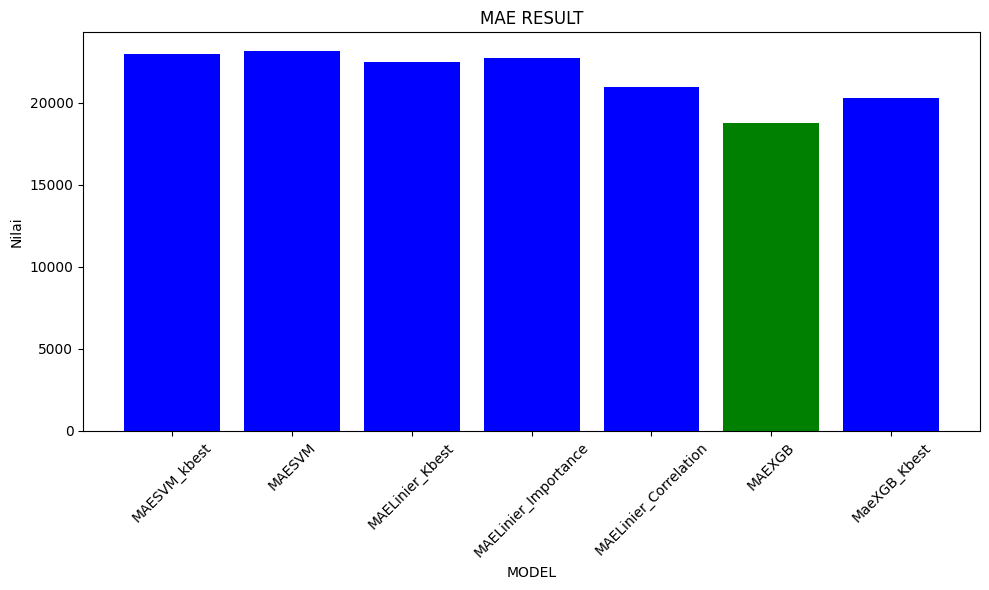

In [136]:
import matplotlib.pyplot as plt

categories = ["MAESVM_kbest", "MAESVM", "MAELinier_Kbest", "MAELinier_Importance", "MAELinier_Correlation", "MAEXGB", "MaeXGB_Kbest"]
colors = ['blue', 'blue', 'blue', 'blue', 'blue', 'green', 'blue']

# Membuat diagram batang
plt.figure(figsize=(10, 6))
plt.bar(categories, Result,color= ['blue', 'blue', 'blue', 'blue', 'blue', 'green', 'blue'])
plt.xlabel("MODEL")
plt.ylabel("Nilai")
plt.title("MAE RESULT")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dari seluruh  hasil model XGB Regressor,Linnier Regresion,SVM Regressor beserta evaluasi dengan menggunkan beberapa metode seperti feature selection, feature importent dan Pearson Correlation dengan pembagian data train 70 % dan test 30 % pada setiap modelnya. Model yang paling baik dalam konteks ini adalah model  XGB regressor karena memiliki MAE yang paling sedikit ini artinya model ini memiliki tingkat akurasi +- yang paling baik.